In [1]:
using Pkg
using Roots
using ForwardDiff
using Roots  
using Plots
using ForwardDiff
using DataFrames

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

In [2]:
bisection(f) = find_zero(f, (0, 1), Bisection(), tracks = tracker) 
D(f) = x->ForwardDiff.derivative(f, float(x))
newton(f) = find_zero((f, D(f)),0, Roots.Newton(),tracks = tracker)
steffenson(f) = find_zero(f, 0, Order2(),tracks = tracker)
tracker = Roots.Tracks();


f1(x) = sin(x) - x/2
f2(x) = 2*x-exp(-x)
f3(x) = (x+3)*(x-1)^2
f4(x) =  20.0*x/(100.0*x*x + 1.0) # Repeller
f5(x) =  (x-1)^7
f6(x) = cos(x) - x


functions = [f1,f2,f3,f4,f5,f6]
methods = [bisection,newton,steffenson]

df = DataFrame(Function=Function[],Method=Function[],Iterations=Float64[],Calls=Float64[] , Result = String[])

for f in functions

    for m in methods

        flag = "CORRECT"

        val = m(f)

        if f(val) != 0
            println("Wrong value in ",f," Method: ", m , " Value: ", f(val))
            flag = "INCORRECT"
        end

        push!(df,(f,m,tracker.steps,tracker.fncalls,flag))

    end
end

df



Wrong value in 

f2 Method: newton Value: -1.1102230246251565e-16


Wrong value in f3 Method: newton Value: 4.564959859473074e-16


Wrong value in f3 Method: steffenson Value: 5.483192153677992e-16


Wrong value in f5 Method: newton Value: -3.429980060199374e-16


Wrong value in f5 Method: steffenson Value: -6.039684575096991e-16


Row,Function,Method,Iterations,Calls,Result
,Function,Function,Float64,Float64,String
1,f1,bisection,0.0,3.0,CORRECT
2,f1,newton,1.0,5.0,CORRECT
3,f1,steffenson,1.0,7.0,CORRECT
4,f2,bisection,62.0,71.0,CORRECT
5,f2,newton,66.0,79.0,INCORRECT
6,f2,steffenson,71.0,88.0,CORRECT
7,f3,bisection,71.0,91.0,CORRECT
8,f3,newton,97.0,143.0,INCORRECT
9,f3,steffenson,125.0,193.0,INCORRECT


 2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (2 pkt)

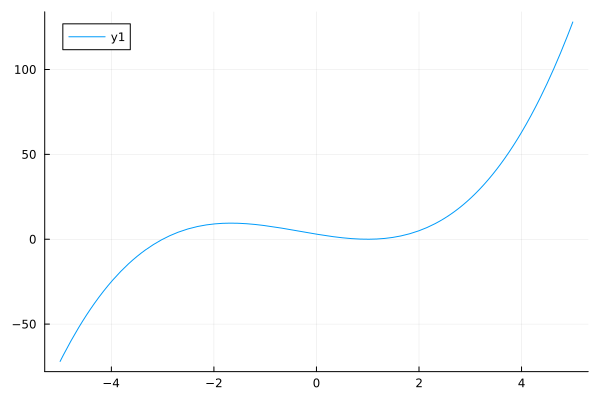

In [3]:
plot(f3)

In [4]:
df2 = DataFrame(Function=Function[],Method=Function[],Iterations=Float64[],Calls=Float64[] , Result = String[])

for m in methods

    flag = "CORRECT"

    val = m(f3)

    if f3(val) != 0
        println("Wrong value in ",f3," Method: ", m , " Value: ", f3(val))
        flag = "INCORRECT"
    end

    push!(df2,(f3,m,tracker.steps,tracker.fncalls,flag))

end

df2

Wrong value in f3 Method: newton Value: 4.564959859473074e-16
Wrong value in f3 Method: steffenson Value: 5.483192153677992e-16


Row,Function,Method,Iterations,Calls,Result
,Function,Function,Float64,Float64,String
1,f3,bisection,265.0,418.0,CORRECT
2,f3,newton,291.0,470.0,INCORRECT
3,f3,steffenson,319.0,520.0,INCORRECT


3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny) (3 pkt)


func x/(x-2)  | x:1.9999999999999998 f(x):-9.007199254740991e15

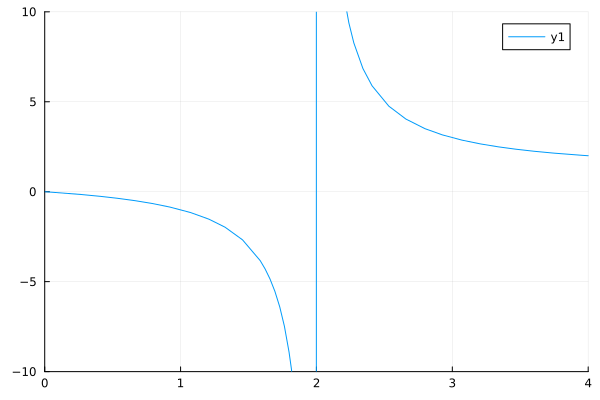

In [5]:
f(x) = x/(x-2)
root = find_zero(f,(1,2),Bisection())
println("func x/(x-2)  | x:", root, " f(x):", f(root))
plot(f, ylim = (-10,10) , xlim = (0,4))

Błedne wyniki wynikające z braku ciągłości funkcji 

f: (x+3)*(x-1)^2 | x:0.9999999882918915 f(x): 5.483192153677992e-16 | Is x root : false


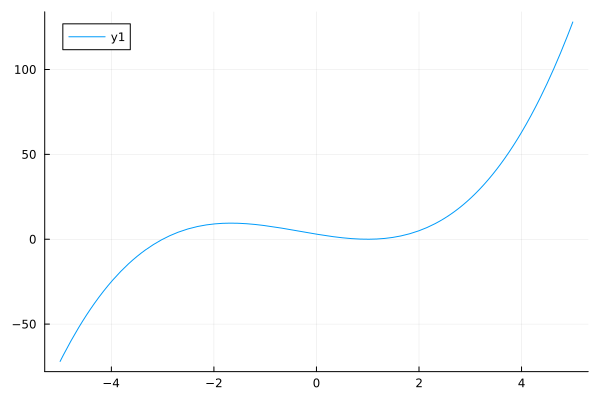

In [6]:
root = steffenson(f3)

println("f: (x+3)*(x-1)^2 | x:", root, " f(x): ", f3(root) , " | Is x root : " , f3(root) == 0)
plot(f3)

Błędny wynik będący rezultatem praktycznie poziomej pochodnej w otoczeniu miejsca zerowego

f: (x+3)*(x-1)^2 | x:0.9999999893171166 f(x): 4.564959859473074e-16 | Is x root : false


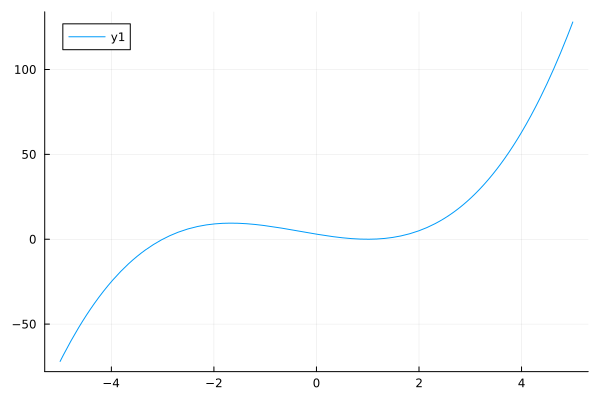

In [7]:
root = newton(f3)

println("f: (x+3)*(x-1)^2 | x:", root, " f(x): ", f3(root) , " | Is x root : " , f3(root) == 0)
plot(f3)


B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

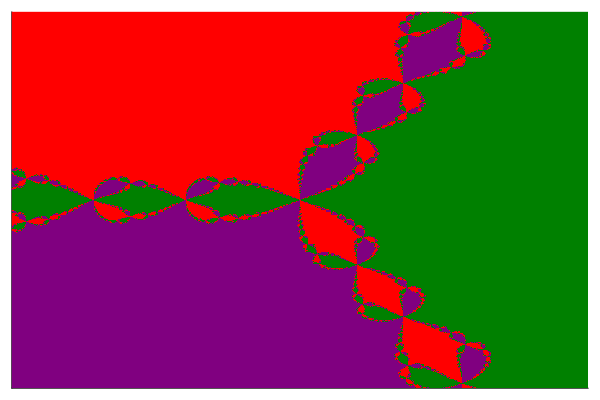

In [16]:
using Symbolics

function get_map(f)
    @variables x
    Dx = Differential(x)
    map = x - f(x) / Dx(f(x)) |> expand_derivatives
    update_expr = build_function(map, x)
    return eval(update_expr)
end

function applyiteratively(x, update; n=100)
    for i in 1:n
        x = update(x)
    end
    return x
end

f(x) = x^3 - 1

update = get_map(f)
lower = -2 - 2im
upper = 2 + 2im
step = 0.5e-2
Z0 = [a+b*im for b in real(lower):step:real(upper),
                    a in imag(lower):step:imag(upper)]
Z100 = applyiteratively.(Z0, update)
heatmap(angle.(Z100), colorbar=false, color=:rainbow, ticks=false)

Wstęga Newtona jest graficzną reprezentacją metody Newtona-Raphsona. Powstaje w skutek nałożenia się wykresu wielomianu oraz prostych stycznych do funkcji w kolejnych iteracjach. Pokazuje ona proces iteracyjny algorytmu, który z każdym krokiem zbliża się do rzeczywistej wartości pierwiastka wielomianu.